## <center>Project - Tsunami predictor</center>

The <u><b>goal of this project is to predict whether an earthquake could trigger a tsunami</b></u> using a classification model. It helps highlight high-risk events and supports better disaster preparedness and response.

### <center>NOTEBOOK STRUCTURE</center> 


**1) Data Preparation**

* Load data
* Inspect structure (`head`, `info`, `describe`)
* Detect and handle missing values (fill or drop)
* Fix inconsistent datatypes
* Correct clearly wrong values (e.g., negative heights, impossible dates)

**2) Exploratory Data Analysis (EDA)**

* Plot variable distributions (histograms, boxplots, KDEs)
* Check correlations (numerical & categorical)
* Identify outliers
* Examine class imbalance
* Assess feature importance / insights
* Decide which features to keep, transform, or drop
* Plan necessary transformations (log, scaling, encoding, etc.)

**3) Validation Framework**

* Split data into train / validation / test sets
* Create `X_train`, `X_val`, `X_test` and corresponding `y` sets
* Encode categorical variables (one-hot, label encoding, target encoding)
* Scale / normalize numerical features if required
* Apply transformations consistently across splits

**4) Modeling & Evaluation**

* Train multiple models
* Compare performance on validation metrics
* Tune hyperparameters (grid search, random search, Bayesian optimization)
* Evaluate the best model on the test set
* Analyze feature importance, residuals, and errors

**5) Save Model & Pipeline**

* Save the trained model using `pickle` or `joblib`
* Optionally save preprocessing pipeline (encoders, scalers, transformers)
* Ensure reproducibility by storing versions of dependencies and parameters
* Document instructions for loading and using the model in production

### **1) Data preparation**

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = 'https://raw.githubusercontent.com/Guilhermertp/machine-learning-zoomcamp2025/refs/heads/main/MidTermProj/data/earthquake_data_tsunami.csv'

In [3]:
!wget $path

--2025-11-16 15:41:06--  https://raw.githubusercontent.com/Guilhermertp/machine-learning-zoomcamp2025/refs/heads/main/MidTermProj/data/earthquake_data_tsunami.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40942 (40K) [text/plain]
Saving to: ‘earthquake_data_tsunami.csv.6’

earthquake_data_tsu 100%[===================>]  39.98K  --.-KB/s    in 0.001s  

2025-11-16 15:41:06 (39.6 MB/s) - ‘earthquake_data_tsunami.csv.6’ saved [40942/40942]



In [4]:
df = pd.read_csv(path)
df.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [5]:
df.columns

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')

In [6]:
df.dtypes

magnitude    float64
cdi            int64
mmi            int64
sig            int64
nst            int64
dmin         float64
gap          float64
depth        float64
latitude     float64
longitude    float64
Year           int64
Month          int64
tsunami        int64
dtype: object

Since all the columns are numerical there is no need to create a separation between categorical and numerical categoricals. And encode columns by converting them intoa  dictionary format and then using DictVectorizer and other operations for encoding and transforming the dicitonaries into a numeric matrix.

In [7]:
# check the null values
df.isnull().sum()

magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64

### **2) EDA**

In [8]:
df.corr()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
magnitude,1.000000,0.209549,0.285552,0.515871,0.113114,-0.091403,-0.110626,0.030644,-0.008552,-0.013911,-0.057083,-0.011926,-0.004726
cdi,0.209549,1.000000,0.317937,0.479788,-0.175417,0.006554,0.098143,-0.097891,0.129003,-0.149048,0.423158,0.007002,0.160266
mmi,0.285552,0.317937,1.000000,0.442423,0.160417,-0.299074,-0.015723,-0.504439,0.144883,-0.005803,-0.212855,-0.035238,-0.147363
sig,0.515871,0.479788,0.442423,1.000000,-0.030100,-0.095318,0.114285,-0.088667,0.204306,-0.190132,0.124439,-0.029189,-0.015500
nst,0.113114,-0.175417,0.160417,-0.030100,1.000000,-0.529371,-0.118812,-0.121982,0.144204,0.173665,-0.688602,-0.014021,-0.600231
dmin,-0.091403,0.006554,-0.299074,-0.095318,-0.529371,1.000000,-0.021933,0.168546,-0.238377,-0.097875,0.529449,0.037502,0.400752
gap,-0.110626,0.098143,-0.015723,0.114285,-0.118812,-0.021933,1.000000,-0.111912,0.087756,-0.313623,0.194002,-0.024953,0.116360
depth,0.030644,-0.097891,-0.504439,-0.088667,-0.121982,0.168546,-0.111912,1.000000,-0.069492,-0.036986,0.178220,0.069213,0.056814
latitude,-0.008552,0.129003,0.144883,0.204306,0.144204,-0.238377,0.087756,-0.069492,1.000000,0.026927,-0.089731,-0.057292,-0.113209
longitude,-0.013911,-0.149048,-0.005803,-0.190132,0.173665,-0.097875,-0.313623,-0.036986,0.026927,1.000000,-0.187947,0.028047,-0.136778


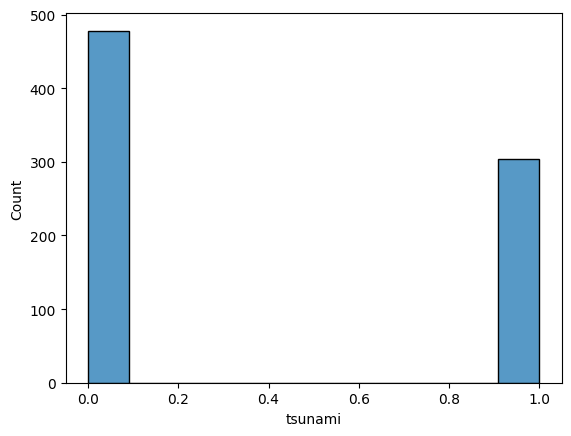

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['tsunami'])
plt.show()

In [10]:
df['tsunami'].value_counts()

tsunami
0    478
1    304
Name: count, dtype: int64

### **3) Setting up the validation framework**

In [11]:
from sklearn.model_selection import train_test_split

# I had to stratify the data or scikit-learn splits the data randomly leading to inbalances in the classes having a bad distribution
# like for the test 40% class "is a Tsunami" and 60% is "not a tsunami"
# validation accuracy becomes meaningless, because it does not match the real distribution.
df_full_train, df_test = train_test_split(df,test_size=0.2,random_state=1,stratify=df['tsunami'])
df_train, df_val = train_test_split(df_full_train,test_size=0.25,random_state=1,stratify=df_full_train['tsunami'])

In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
y_train = df_train['tsunami'].values
y_val = df_val['tsunami'].values
y_test = df_test['tsunami'].values

In [14]:
# Delete the target variable for the datasets I will use for training,validate and test to avoid future problems
del df_train['tsunami']
del df_val['tsunami']
del df_test['tsunami']

In [15]:
X_train = df_train.values
X_val   = df_val.values
X_test  = df_test.values

### **4) Testing models and evaluation**

#### Models to test

1. Logistic Regression (Simple Baseline)
2. Random Forest Classifier
3. LightGBM

#### 1. Logistic Regression (Simple Baseline)

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Predictions
train_pred = log_model.predict(X_train_scaled)
val_pred = log_model.predict(X_val_scaled)
test_pred = log_model.predict(X_test_scaled)

print("\nTraining Accuracy:", accuracy_score(y_train, train_pred))
print("Validation Accuracy:", accuracy_score(y_val, val_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, test_pred))
print("\nTest Classification Report:")
print(classification_report(y_test, test_pred))

# Overfitting Check
if accuracy_score(y_train, train_pred) - accuracy_score(y_val, val_pred) > 0.05:
    print("\n Logistic Regression model may be overfitting!!!")
else:
    print("\n Logistic Regression model is not overfitting.")


Training Accuracy: 0.8504273504273504
Validation Accuracy: 0.821656050955414
Test Accuracy: 0.8662420382165605

Test Confusion Matrix:
[[83 13]
 [ 8 53]]

Test Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.89        96
           1       0.80      0.87      0.83        61

    accuracy                           0.87       157
   macro avg       0.86      0.87      0.86       157
weighted avg       0.87      0.87      0.87       157


 Logistic Regression model is not overfitting.


#### 2. Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Model
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

# Train
rf.fit(X_train, y_train)

# Predictions
train_pred = rf.predict(X_train)
val_pred   = rf.predict(X_val)
test_pred  = rf.predict(X_test)

# Accuracy scores
print("\nTraining Accuracy:", accuracy_score(y_train, train_pred))
print("Validation Accuracy:", accuracy_score(y_val, val_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))

# Test set evaluation
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, test_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, test_pred))


# Overfitting Check
if accuracy_score(y_train, train_pred) - accuracy_score(y_val, val_pred) > 0.05:
    print("\n Random Forest Classifier model may be overfitting!!!")
else:
    print("\n Random Forest Classifier model is not overfitting.")


Training Accuracy: 1.0
Validation Accuracy: 0.8853503184713376
Test Accuracy: 0.9363057324840764

Confusion Matrix (Test Set):
[[89  7]
 [ 3 58]]

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        96
           1       0.89      0.95      0.92        61

    accuracy                           0.94       157
   macro avg       0.93      0.94      0.93       157
weighted avg       0.94      0.94      0.94       157


 Random Forest Classifier may be overfitting!!!


##### 2.1 Random Forest Classifier model <u>Tuning</u>

#### 3) LIGHTGBM

In [18]:
# To intall lightgbm in my local environment

#import sys
#!{sys.executable} -m pip install lightgbm

In [24]:
from lightgbm import LGBMClassifier

# LightGBM Model
lgbm = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.05,
    num_leaves=64,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgbm.fit(X_train, y_train)

# Predictions
train_pred = lgbm.predict(X_train)
val_pred = lgbm.predict(X_val)
test_pred = lgbm.predict(X_test)

print("\n========== LightGBM ==========")

print("\nTraining Accuracy:", accuracy_score(y_train, train_pred))
print("Validation Accuracy:", accuracy_score(y_val, val_pred))
print("Test Accuracy:", accuracy_score(y_test, test_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, val_pred))

print("\nClassification Report:")
print(classification_report(y_val, val_pred))

# Overfitting Check
if accuracy_score(y_train, train_pred) - accuracy_score(y_val, val_pred) > 0.05:
    print("\n LightGBM model may be overfitting.")
else:
    print("\n LightGBM model is not overfitting.")





[LightGBM] [Info] Number of positive: 182, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 468, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.388889 -> initscore=-0.451985
[LightGBM] [Info] Start training from score -0.451985
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


##### 3.1 LightGBM model <u>Tuning</u>

In [ ]:
Try tuning:

    num_leaves: [31, 64, 128]
    learning_rate: [0.01, 0.03, 0.05]
    n_estimators: [200, 500, 800]
    min_child_samples: [5, 10, 20]
    subsample: [0.7, 0.8, 1.0]
    colsample_bytree: [0.7, 0.8, 1.0]

### **5) Save the model**

In [26]:
import joblib

# Save the trained model
joblib.dump(lgbm, "lgbm_model.pkl")
print("Model saved to lgbm_model.pkl")


Model saved to lgbm_model.pkl


In [27]:
# testing the saved model
import joblib

# Load the model
loaded_model = joblib.load("lgbm_model.pkl")

# Use it for predictions
test_pred_loaded = loaded_model.predict(X_test)
print("Test Accuracy with loaded model:", accuracy_score(y_test, test_pred_loaded))


Test Accuracy with loaded model: 0.9171974522292994


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
